In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("dog.txt",sep="\t")

In [3]:
data.head()

,age,weight,height,breed
0,9.47,6.20,6.80,1
1,7.97,8.63,8.92,0
2,9.51,6.40,5.78,1
3,8.96,8.82,6.28,2
4,8.37,3.89,5.62,1


In [4]:
data.shape

(200, 4)

In [5]:
features=data.drop('breed',axis=1)

In [6]:
features.head()

,age,weight,height
0,9.47,6.20,6.80
1,7.97,8.63,8.92
2,9.51,6.40,5.78
3,8.96,8.82,6.28
4,8.37,3.89,5.62


In [7]:
y=data['breed']

In [8]:
y.head()

0    1
1    0
2    1
3    2
4    1
Name: breed, dtype: int64

In [21]:
y=np.array(data['breed'])

In [22]:
y.shape

(200,)

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
y.shape

(200,)

In [13]:
type(y)

pandas.core.series.Series

In [26]:
y=np.array(data['breed'])
print(y.shape)

(200,)


In [27]:
np.transpose([y]).shape

(200, 1)

In [29]:
one=OneHotEncoder(sparse=False).fit_transform(y.reshape(-1,1))

In [30]:
print(one[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [18]:
import numpy as np

In [19]:

# This sets the  labels (numerical)
labels = np.array(data['breed'])

###
# REPLACE THE <addLabels> BELOW WITH labels
###
onehot = OneHotEncoder(sparse = False).fit_transform(np.transpose([labels]))
###

print(onehot[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [31]:
x_train=features.iloc[:160]

In [32]:
x_train.shape

(160, 3)

In [33]:
x_test=features.iloc[160:]

In [34]:
y_train=onehot[:160]

In [35]:
y_test=onehot[160:]

In [36]:
import keras

Using TensorFlow backend.


In [44]:
import tensorflow as tf

In [41]:
model=keras.models.Sequential()

In [42]:
model.add(keras.layers.Dense(4,input_dim=3,activation="relu"))

In [43]:
model.add(keras.layers.Dense(2, activation = 'relu'))

In [45]:
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

In [47]:
model.compile(loss="categorical_crossentropy",optimizer='sgd',metrics=['accuracy'])

In [48]:
training_stats = model.fit(x_train,y_train, batch_size = 1, epochs = 24, verbose = 0)
###

In [50]:
training_stats.history['loss'][-1]

0.17074662309806196

In [52]:
import matplotlib.pyplot as plt

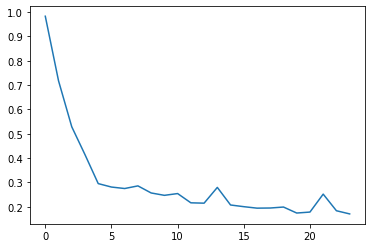

In [53]:
plt.plot(training_stats.history['loss'])

In [54]:
evaluation = model.evaluate(x_test, y_test, verbose=0)

In [55]:
evaluation

[0.31878040060400964, 0.949999988079071]

In [56]:
model.metrics_names

['loss', 'accuracy']

In [57]:
new_sample=[9,7,7]

In [60]:
model.predict(np.array([new_sample]))

array([[0.03404799, 0.9371407 , 0.02881128]], dtype=float32)